# Solving large-scale linear systems of equations by a quantum hybrid algorithm: matrices example

## Problem description

To begin with, we define a problem for quantum devices to solve and discuss how it corresponds to the real
computational tasks. As an exemplary task, we choose an efficient solution of the system of linear equations

$$\begin{equation} 
\frac{1}{2\pi i} (log(\hat{U})\vec{x}=\vec{b} \\
\rho(log(\hat{U})) < 1
\equation}
, \tag*{(1)}
$$

where $\hat{U}$ and $\vec{b}$ are given matrix and vector and $\rho(log(\hat{U}))$ is the spectral radius of the $log(\hat{U})$. One notices the specific structure of this system, which differs from the usual
$A\vec{x}=\vec{b}$. Let us now discuss the problem statement in more detail.


We solve Eq. (1) by using the quantum algorithm that employs the matrix exponentiation as a preparation step
[6]. In general, such an exponentiation procedure is a major challenge. Let us assume that we know the physical operator $\hat{U}$, the exponent of the matrix $log(\hat{U})$, which we aim to invert. Next, since the logarithmic function is ambiguous, we fix the resulting matrix spectrum such that the largest absolute value of eigenvalues were less than 1.  
For a quantum circuit construction, we do not decompose the random matrix into the single-qubit and CNOT
gates, but, instead, we consider the matrix $\hat{U}$ comprising quantum gates. Furthermore, we choose $\vec{b}$ to make the corresponding state $|b\rangle = |0\rangle$ a computational basis.  
The entire family of gate-based matrices is expressed as a tensor product of M local operators $\hat{U_i}$
 that act only on the i-dimension subset of the computational circuit:
$$\hat{U} = \bigotimes^{M}_{i=1}\hat{U_i}.\tag*{(2)}$$  


For illustrative purposes, let us consider three types of $\hat{U}$ that can be naturally implemented in quantum circuits.  
$TP_1:\hat{U}_{TP_1}$
is the **T**ensor **P**roduct of single-qubit gates $\hat{U}_s$ resulting in $dim(\hat{U}_i) = dim(\hat{U}_s) = 2$: this operator does not entangle qubits.


$TP_2:\hat{U}_{TP_2}$ is the **T**ensor **P**roduct of two-qubit operators, $dim(\hat{U}_i) = 2^2$ that leads to the emergence of two-qubit clusters within which qubits are entangled.


$NTP: \hat{U}_{NTP}$ is **N**ot a **T**ensor **P**roduct of single- or twoqubit gates that leads to $dim(\hat{U}_i) = dim(\hat{U}): this operator entangles all qubits.

$TP_1$, $TP_2$, and $NTP$  perform different levels of approximation (from low to high) and result in different complexity ot the matrix (from simple to complex). 
We can interpret this as different levels of simulating the Hamiltonian evolution of A in $U=e^{-iAt}$.

The QPE protocol, which is a vital subroutine of our algorithm, involves controlled unitary operations and,
therefore, is the most complicated part. Indeed, the realization of an arbitrary control single-qubit gate in $\hat{U}$ requires at least two CNOTs [5] that leads to a highly complex quantum circuit, since n-qubit $\hat{U}_{TP_1}$, $\hat{U}_{TP_2}$, and $\hat{U}_{NTP}$ comprises n, 2n − 1 and 2n − 2 single-qubit gates
respectively. Thus, we consider the continuous subset of single-qubit gates $\hat{U}_s$ in a way that the control-$\hat{U}_s$ is implemented via a single CNOT resulting in dramatic simplification of the algorithm circuit. For more details see Supplementary Information (SI).

We introduce a correcting single-qubit gate $\hat{U}_c$ in $\hat{U}_{TP_1}$, $\hat{U}_{TP_2}$, $\hat{U}_{NTP}$
 matrices that on one hand allows us to control the matrix spectrum for each circuit type, and, on the other hand, leads to $\hat{U}^{2s}_{TP_1}$, $\hat{U}^{2s}_{TP_2}$, $\hat{U}^{2s}_{NTP} = \hat{U}^{2s}_c ⊗ \hat{I}$, where $s ∈ \mathrm{N}$, that greatly simplifies the QPE as well.



In [ ]:
from qiskit import QuantumRegister
from generate_matrix import generate_random_U_circ, get_matrix_from_circ
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Quantum circuit example

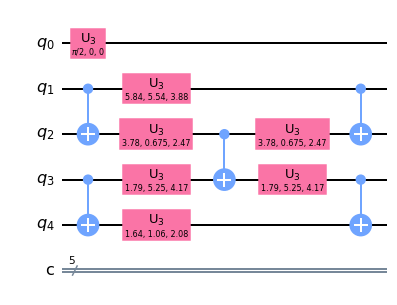

In [27]:
circ_type = 'NTP' #'TP1', 'TP2', 'NTP'

circ_registers = list(range(5))

circ = generate_random_U_circ(circ_registers, circ_type=circ_type)
circ.draw(output='mpl')

# Matrix generation

Matrix A is of shape: (256, 256)


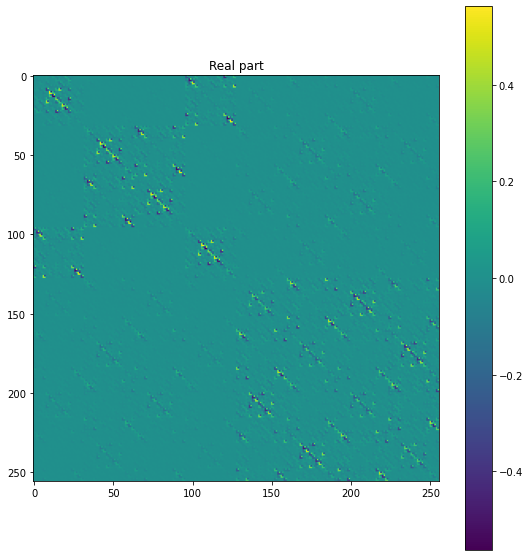

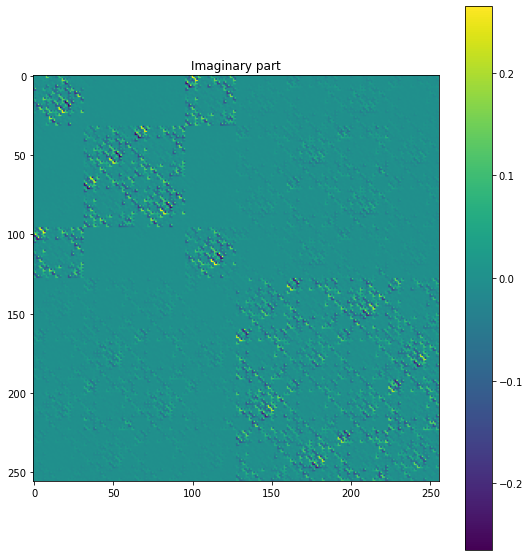

Circuit for the matrix:


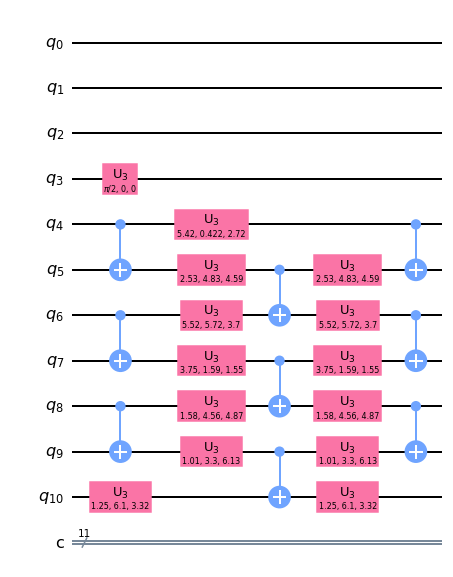

In [31]:
# Definition of the matrix properties 
A_size = 8 # Matrix size in qubits 2^n
circ_type = 'NTP' #'TP1', 'TP2', 'NTP'

# Generatin of the quantum circuit
np.set_printoptions(suppress=True, precision=5)
circ_registers = [i + 3 for i in range(A_size)]
ops = generate_random_U_circ(circ_registers, circ_type=circ_type)
matrix = get_matrix_from_circ(ops, circ_registers)

# Printing and plotting
print('Matrix A is of shape: {}'.format(np.shape(matrix)))

matrix_real = np.real(matrix)
matrix_imag = np.imag(matrix)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
pos = ax1.imshow(matrix_real)
fig.colorbar(pos, ax=ax1)
plt.title('Real part')
plt.show()

fig = plt.figure(figsize=(20,10))
ax2 = fig.add_subplot(122)
pos = ax2.imshow(matrix_imag)
fig.colorbar(pos, ax=ax2)
plt.title('Imaginary part')
plt.show()

print('Circuit for the matrix:')
ops.draw(output='mpl')